In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_path = "data/horse-colic.data"
df = pd.read_csv(data_path, header=None, delim_whitespace=True)

In [ ]:
# ? are replaced by nans
df = df.replace('?', np.nan)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [ ]:
# Rename columns
list_column_names = ["V" + str(i) for i in range(1, 29)]
df.columns = list_column_names

In [ ]:
df.dtypes

V1     object
V2      int64
V3      int64
V4     object
V5     object
V6     object
V7     object
V8     object
V9     object
V10    object
V11    object
V12    object
V13    object
V14    object
V15    object
V16    object
V17    object
V18    object
V19    object
V20    object
V21    object
V22    object
V23    object
V24     int64
V25     int64
V26     int64
V27     int64
V28     int64
dtype: object

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [ ]:
df[["V3", "V4", "V5", "V6", "V16", "V19", "V20", "V22"]]

,V3,V4,V5,V6,V16,V19,V20,V22
0,530101,38.50,66,28,NaN,45.00,8.40,NaN
1,534817,39.2,88,20,NaN,50,85,2
2,530334,38.30,40,24,NaN,33.00,6.70,NaN
3,5290409,39.10,164,84,5.00,48.00,7.20,5.30
4,530255,37.30,104,35,NaN,74.00,7.40,NaN
...,...,...,...,...,...,...,...,...
295,533886,NaN,120,70,NaN,55,65,NaN
296,527702,37.20,72,24,NaN,44.00,NaN,3.30
297,529386,37.50,72,30,NaN,60.00,6.80,NaN
298,530612,36.50,100,24,NaN,50.00,6.00,3.40


# Determine continuous_columns, discrete and nominal columns

In [ ]:
df["V4"].value_counts()

38.00    16
37.80    13
38.30    12
38.50    10
38.60    10
         ..
36.40     1
39.7      1
35.4      1
39.90     1
37.2      1
Name: V4, Length: 65, dtype: int64

In [ ]:
continuous_columns = ['V4', 'V16',
                     'V19', 'V20', 'V22']

discrete_columns = ['V5', 'V6'] # Let's check in the description

nominal_columns = ['V3', 'V1', 'V2', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13',
                       'V14', 'V15', 'V17', 'V18',
                       'V21', 'V23', 'V25',
                       'V26', 'V27', 'V28']

In [ ]:
len(df["V25"].astype(str).iloc[2])

1

In [ ]:
df["V6"].median()

24.5

# Handling V25 column based on the description

In [ ]:
df["V25"].value_counts()

0        56
3111     33
3205     29
2208     20
2205     13
         ..
5205      1
2305      1
5000      1
7400      1
11300     1
Name: V25, Length: 61, dtype: int64

In [ ]:
def create_new_features(df, col_name):
  modified_col_name = f"{col_name}_modified"
  df[modified_col_name] = df[col_name].apply(lambda x: str(x)
                                      if pd.notna(x) and len(str(x)) > 3
                                      else None)

  # Create new features based on the description in hourse-colic.names.original
  df[f"{col_name}_lesion_site"] = df[modified_col_name].apply(lambda x: int(x[:2])
                                              if x and x[:2] in ['00', '11']
                                              else int(x[0])
                                              if x else None)
  df[f"{col_name}_type"] = df[modified_col_name].apply(lambda x: int(x[2])
                                        if x and x[:2] in ['00', '11']
                                        else int(x[1])
                                        if x else None)
  df[f"{col_name}_subtype"] = df[modified_col_name].apply(lambda x: int(x[3])
                                            if x and x[:2] in ['00', '11']
                                          else int(x[2])
                                          if x else None)
  df[f"{col_name}_specific_code"] = df[modified_col_name].apply(lambda x: int(x[4:])
                                                if x and len(x) > 4 and x[3:] != '10'
                                                else int(x[3:])
                                                if x and len(x) > 3
                                                else None)

  df = df.drop(columns=[modified_col_name])
  return df

In [ ]:
df = create_new_features(df, "V25")
df = create_new_features(df, "V26")
df = create_new_features(df, "V27")

In [ ]:
df.loc[df["V25_specific_code"] == 10][["V25", "V25_specific_code"]]

,V25,V25_specific_code
105,31110,10.0
126,31110,10.0
186,21110,10.0
189,31110,10.0
203,31110,10.0
245,41110,10.0
269,31110,10.0
285,31110,10.0
292,31110,10.0


In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,530334,38.30,40,24,1,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,5290409,39.10,164,84,4,1,6,2,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2,1,527702,37.20,72,24,3,2,4,2,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,1,1,529386,37.50,72,30,4,3,4,1,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1,1,530612,36.50,100,24,3,3,3,1,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter columns that contain "V25", "V26", or "V27" in their names
columns_to_show = [col for col in df.columns if "V25" in col or "V26" in col or "V27" in col]

# Display only the filtered columns
filtered_df = df[columns_to_show]
filtered_df


,V25,V26,V27,V25_lesion_site,V25_type,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,11300,0,0,11.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4300,0,0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3205,0,0,3.0,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,3205,0,0,3.0,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["V26"].value_counts()

0       293
3111      3
1400      1
7111      1
6112      1
3112      1
Name: V26, dtype: int64

In [ ]:
df["V26_lesion_site"].value_counts()

3.0    4
1.0    1
7.0    1
6.0    1
Name: V26_lesion_site, dtype: int64

# Imputate missing values

In [ ]:
for col in nominal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
for col in discrete_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df[continuous_columns] = df[continuous_columns].astype(float)

In [ ]:
for col in continuous_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
for col in columns_to_show:
    df[col].fillna(-1, inplace=True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,2,1,530101,38.500000,66,28,3,3,1,2,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1,534817,39.200000,88,20,3,1,4,1,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,1,530334,38.300000,40,24,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,9,5290409,39.100000,164,84,4,1,6,2,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2,1,530255,37.300000,104,35,3,1,6,2,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,38.167917,120,70,4,1,4,2,...,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
296,2,1,527702,37.200000,72,24,3,2,4,2,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
297,1,1,529386,37.500000,72,30,4,3,4,1,...,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
298,1,1,530612,36.500000,100,24,3,3,3,1,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
filtered_df = df[columns_to_show]
filtered_df

,V25,V26,V27,V25_lesion_site,V25_type,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,11300,0,0,11.0,3.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4300,0,0,4.0,3.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3205,0,0,3.0,2.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
296,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
297,3205,0,0,3.0,2.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
298,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Detecting and handling outliers

In [ ]:
from scipy import stats

for col in continuous_columns:
    # Calculate Z-score values for the column
    df[col + '_zscore'] = stats.zscore(df[col])

    # Assuming that outliers are indicated by absolute Z-scores greater than 3
    outlier_indices = df[abs(df[col + '_zscore']) > 3].index

    # Replace outliers with the median of the column
    mean_value = df[col].mean()

    df.loc[outlier_indices, col] = mean_value

    # Drop the Z-score column as it's no longer needed
    df.drop(columns=[col + '_zscore'], inplace=True)
    break

In [ ]:
outlier_indices

Int64Index([44, 54, 91, 141, 238, 259], dtype='int64')

In [ ]:
df[col].iloc[outlier_indices]

44     38.167917
54     38.167917
91     38.167917
141    38.167917
238    38.167917
259    38.167917
Name: V4, dtype: float64

<Axes: >

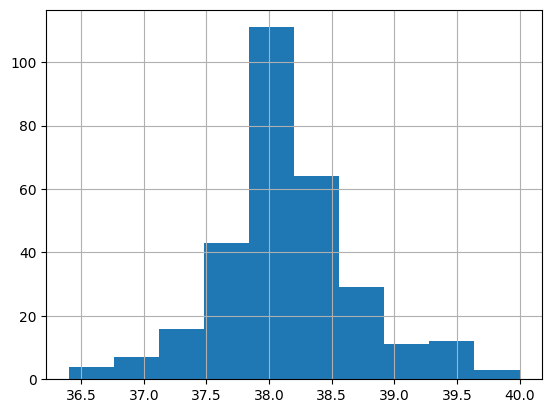

In [ ]:
df[col].astype(float).hist()

# Scaling

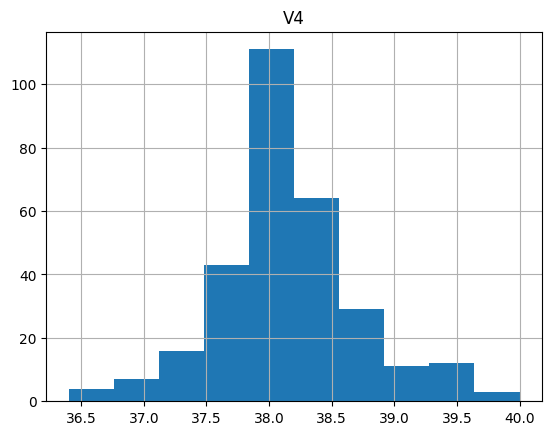

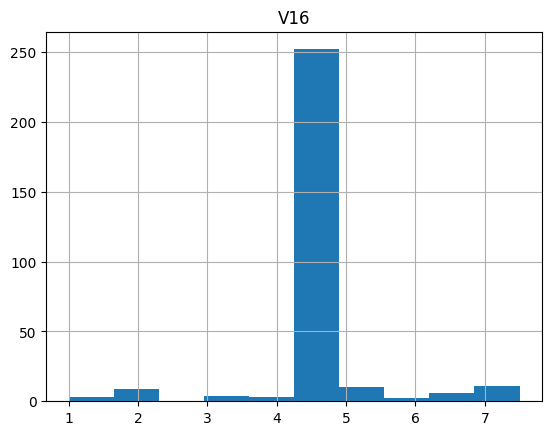

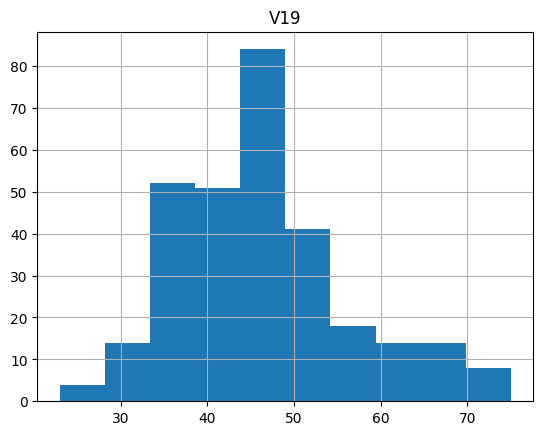

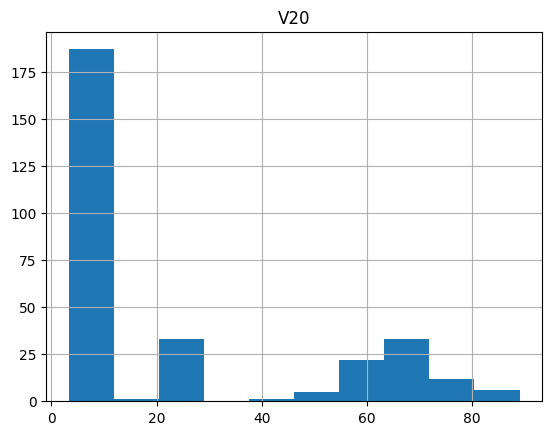

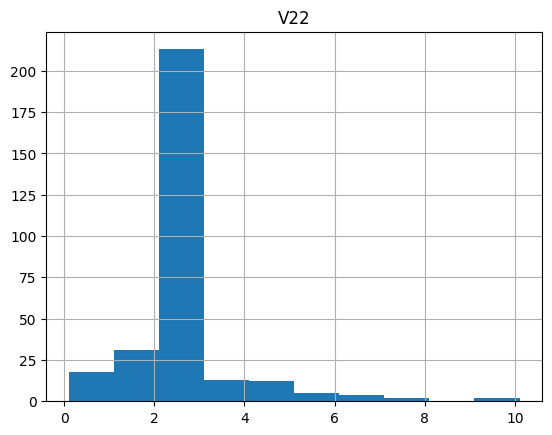

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'continuous_columns' is a list of column names in the DataFrame 'df'
for col in continuous_columns:
    df[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
bell_curve_type_columns = ["V4", "V19"]
not_bell_curve_type_columns = ["V16", "V20", "V22"]

In [ ]:
df[["V4", "V16"]]

,V4,V16
0,0.583333,0.570392
1,0.777778,0.570392
2,0.527778,0.570392
3,0.750000,0.615385
4,0.250000,0.570392
...,...,...
295,0.491088,0.570392
296,0.222222,0.570392
297,0.305556,0.570392
298,0.027778,0.570392


In [ ]:
df["V3"].value_counts()

532349     2
528151     2
5279822    2
528469     2
529424     2
          ..
533696     1
5297379    1
533736     1
534963     1
534618     1
Name: V3, Length: 284, dtype: int64

# One Hot Encoding

In [ ]:
# OneHot Encoding for ML
onehot_encoders = {}
new_columns = []

for col in nominal_columns:
    encoder = OneHotEncoder(sparse_output=False)
    new_data = encoder.fit_transform(df[col].to_numpy().reshape(-1, 1))

    new_columns.extend(encoder.get_feature_names_out([col]))

    new_df = pd.DataFrame(new_data, columns=encoder.get_feature_names_out([col]))
    df = pd.concat([df, new_df], axis=1)

    onehot_encoders[col] = encoder

In [ ]:
df.drop(columns=nominal_columns, inplace=True)

In [ ]:
df

,V4,V5,V6,V16,V19,V20,V22,V24,V25_lesion_site,V25_type,...,V26_0,V26_1400,V26_3111,V26_3112,V26_6112,V26_7111,V27_0,V27_2209,V28_1,V28_2
0,0.583333,66,28,0.570392,0.423077,0.059510,0.291961,2,11.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.777778,88,20,0.570392,0.519231,0.953326,0.190000,2,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.527778,40,24,0.570392,0.192308,0.039673,0.291961,2,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.750000,164,84,0.615385,0.480769,0.045508,0.520000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,104,35,0.570392,0.980769,0.047841,0.291961,2,4.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.491088,120,70,0.570392,0.615385,0.719953,0.291961,2,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,0.222222,72,24,0.570392,0.403846,0.246872,0.320000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.305556,72,30,0.570392,0.711538,0.040840,0.291961,1,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
298,0.027778,100,24,0.570392,0.519231,0.031505,0.330000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(df) == len(df.dropna())

True

In [ ]:
df.max().max()

<ipython-input-43-ea1760cdee31>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max().max()


11.0

In [ ]:
min_max_scaler_list = []
for col in df.columns:
    min_max_scaler = MinMaxScaler()
    df[col] = min_max_scaler.fit_transform(df[[col]])
    min_max_scaler_list.append(min_max_scaler)

In [ ]:
df.max().max()

1.0000000000000002

In [ ]:
df.min().min()

0.0

# Save df and label encoder objects

In [ ]:
from pathlib import Path

# Creating folders
def create_new_folder(folder):
    Path(folder).mkdir(parents=True, exist_ok=True)

folder = 'artifacts/encoders'
create_new_folder(folder)

folder = 'artifacts/preprocessed_data'
create_new_folder(folder)

In [ ]:
with open('artifacts/encoders/onehot_encoders.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(onehot_encoders, file)

with open('artifacts/encoders/min_max_scaler.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(min_max_scaler_list, file)

In [ ]:
df.to_csv('artifacts/preprocessed_data/saved_dataframe_new.csv', index=False)

In [ ]:
df

,V4,V5,V6,V16,V19,V20,V22,V24,V25_lesion_site,V25_type,...,V26_0,V26_1400,V26_3111,V26_3112,V26_6112,V26_7111,V27_0,V27_2209,V28_1,V28_2
0,0.583333,0.233766,0.227273,0.570392,0.423077,0.059510,0.291961,1.0,1.000000,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.777778,0.376623,0.136364,0.570392,0.519231,0.953326,0.190000,1.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.527778,0.064935,0.181818,0.570392,0.192308,0.039673,0.291961,1.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.750000,0.870130,0.863636,0.615385,0.480769,0.045508,0.520000,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.480519,0.306818,0.570392,0.980769,0.047841,0.291961,1.0,0.416667,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.491088,0.584416,0.704545,0.570392,0.615385,0.719953,0.291961,1.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,0.222222,0.272727,0.181818,0.570392,0.403846,0.246872,0.320000,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.305556,0.272727,0.250000,0.570392,0.711538,0.040840,0.291961,0.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
298,0.027778,0.454545,0.181818,0.570392,0.519231,0.031505,0.330000,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
matching_columns = [col for col in df.columns if 'V24' in col]
matching_columns

['V24']